In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import os

In [188]:
print(os.getcwd())

C:\Users\taroo\Desktop\compro\MoviePicks_Project\CSVs_files


In [189]:

orig_df = pd.read_csv('orig_movie.csv', lineterminator='\n')

orig_df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1308766975,92,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,"['Columbia Pictures', 'Sony Pictures Animation...",313522201,140,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0,94,Control is an illusion.


In [190]:
orig_df.shape

(10000, 15)

In [191]:
orig_df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline'],
      dtype='object')

In [192]:
orig_df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

Handling missing data

In [193]:
null_percent = orig_df.isnull().sum() / len(orig_df) * 100
null_percent

Unnamed: 0               0.00
id                       0.00
title                    0.00
release_date             0.23
genres                   0.00
original_language        0.00
vote_average             0.00
vote_count               0.00
popularity               0.00
overview                 0.76
budget                   0.00
production_companies     0.00
revenue                  0.00
runtime                  0.00
tagline                 26.17
dtype: float64

<Axes: >

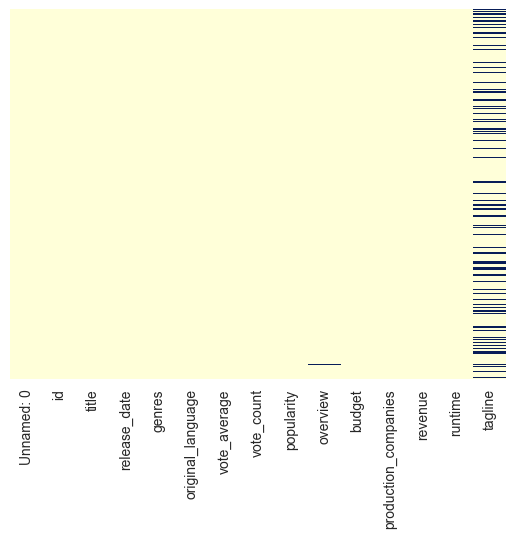

In [194]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [195]:
df = orig_df.copy()
df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

In [196]:
nan_rows = df[df['release_date'].isna()]
nan_rows

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
1072,1072,626412,Alienoid: Part 2,NaN,[],Korean,0.0,0,47.439,NaN,0,['Caper Film'],0,0,NaN
1298,1298,1034541,Terrifier 3,NaN,"['Horror', 'Fantasy', 'Thriller']",English,0.0,0,41.450,"In the aftermath of Terrifier 2, the third ins...",0,"['Dark Age Cinema', 'Fuzz on the Lens Producti...",0,0,NaN
1537,1537,421892,Shrek 5,NaN,"['Animation', 'Family', 'Comedy', 'Fantasy']",English,0.0,0,37.458,"Plot unknown. A soft-reboot of the animated ""S...",0,['DreamWorks Animation'],0,0,NaN
1593,1593,969681,Spider-Man 4,NaN,['Action'],English,0.0,0,36.681,The next installment of the MCU Spider-Man fra...,0,"['Marvel Studios', 'Columbia Pictures', 'Pasca...",0,0,NaN
1642,1642,1108427,Moana,NaN,"['Adventure', 'Comedy', 'Family', 'Fantasy']",English,0.0,0,35.976,"In Ancient Polynesia, when a terrible curse in...",0,"['Walt Disney Pictures', 'Seven Bucks Producti...",0,0,NaN
2216,2216,1126217,Fast X: Part 3,NaN,[],English,0.0,0,30.089,The twelfth and potentially final installment ...,0,[],0,0,NaN
2704,2704,631969,Kingsman: The Blue Blood,NaN,"['Action', 'Comedy', 'Adventure']",English,0.0,0,26.741,The upcoming fourth installment in the Kingsma...,0,"['Marv Films', '20th Century Studios']",0,0,NaN
2737,2737,730629,John Wick: Chapter 5,NaN,"['Action', 'Adventure', 'Crime', 'Thriller']",English,0.0,0,26.483,The fifth installment in the John Wick franchi...,0,"['Summit Entertainment', 'Thunder Road']",0,0,NaN
3359,3359,504075,Wolf Warrior 3,NaN,"['Action', 'War']",Chinese,0.0,0,23.506,The third movie about a Chinese special force ...,0,[],0,90,NaN
3442,3442,553301,Your Name,NaN,"['Drama', 'Fantasy', 'Romance']",English,0.0,0,23.115,Two teenagers discover they are magically and ...,0,['Bad Robot'],0,0,NaN


<Axes: >

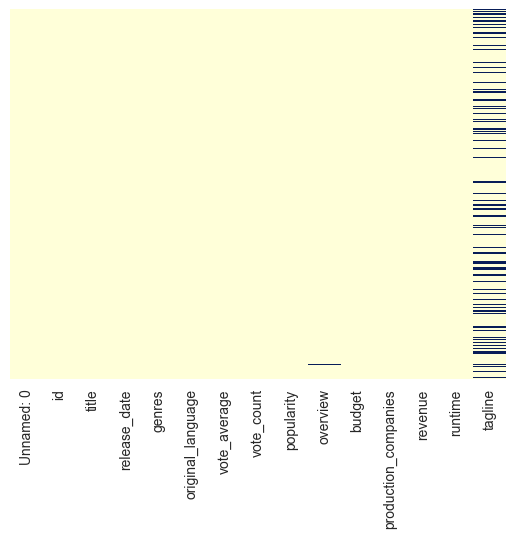

In [197]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [198]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [199]:
nan_rows = df[df['release_date'].isna()]
nan_rows

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
1072,1072,626412,Alienoid: Part 2,NaT,[],Korean,0.0,0,47.439,NaN,0,['Caper Film'],0,0,NaN
1298,1298,1034541,Terrifier 3,NaT,"['Horror', 'Fantasy', 'Thriller']",English,0.0,0,41.450,"In the aftermath of Terrifier 2, the third ins...",0,"['Dark Age Cinema', 'Fuzz on the Lens Producti...",0,0,NaN
1537,1537,421892,Shrek 5,NaT,"['Animation', 'Family', 'Comedy', 'Fantasy']",English,0.0,0,37.458,"Plot unknown. A soft-reboot of the animated ""S...",0,['DreamWorks Animation'],0,0,NaN
1593,1593,969681,Spider-Man 4,NaT,['Action'],English,0.0,0,36.681,The next installment of the MCU Spider-Man fra...,0,"['Marvel Studios', 'Columbia Pictures', 'Pasca...",0,0,NaN
1642,1642,1108427,Moana,NaT,"['Adventure', 'Comedy', 'Family', 'Fantasy']",English,0.0,0,35.976,"In Ancient Polynesia, when a terrible curse in...",0,"['Walt Disney Pictures', 'Seven Bucks Producti...",0,0,NaN
2216,2216,1126217,Fast X: Part 3,NaT,[],English,0.0,0,30.089,The twelfth and potentially final installment ...,0,[],0,0,NaN
2704,2704,631969,Kingsman: The Blue Blood,NaT,"['Action', 'Comedy', 'Adventure']",English,0.0,0,26.741,The upcoming fourth installment in the Kingsma...,0,"['Marv Films', '20th Century Studios']",0,0,NaN
2737,2737,730629,John Wick: Chapter 5,NaT,"['Action', 'Adventure', 'Crime', 'Thriller']",English,0.0,0,26.483,The fifth installment in the John Wick franchi...,0,"['Summit Entertainment', 'Thunder Road']",0,0,NaN
3359,3359,504075,Wolf Warrior 3,NaT,"['Action', 'War']",Chinese,0.0,0,23.506,The third movie about a Chinese special force ...,0,[],0,90,NaN
3442,3442,553301,Your Name,NaT,"['Drama', 'Fantasy', 'Romance']",English,0.0,0,23.115,Two teenagers discover they are magically and ...,0,['Bad Robot'],0,0,NaN


In [200]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [201]:
df['overview'] = df['overview'].fillna('N/A')
df['tagline'] = df['tagline'].fillna('N/A')
df[df['genres'].str.len() == 2]
df = df[~df['original_language'].isin(['xx', 'sh'])]
df = df.dropna(subset=['release_date'])
df = df.reset_index(drop=True)

<Axes: >

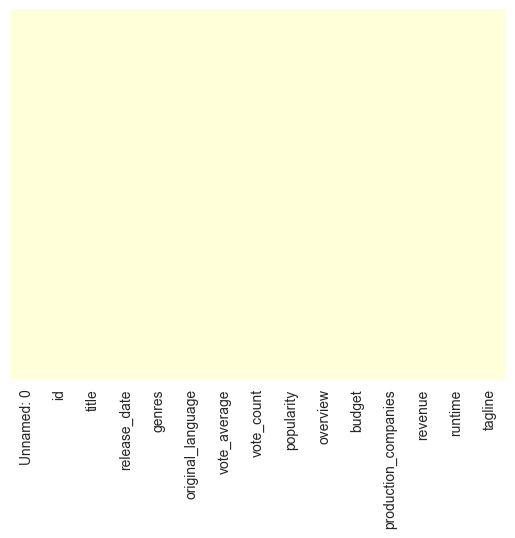

In [202]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

Distribution and Ranges of Values

In [203]:
# Separate the genres
df['genres'] = df['genres'].apply(lambda x: eval(x))

df_separated_genres = df.explode('genres')
df_separated_genres.reset_index(drop=True, inplace=True)
df_separated_genres

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,Action,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,0,385687,Fast X,2023-05-17,Crime,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
2,0,385687,Fast X,2023-05-17,Thriller,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
3,1,603692,John Wick: Chapter 4,2023-03-22,Action,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
4,1,603692,John Wick: Chapter 4,2023-03-22,Thriller,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25908,9997,28774,Communion,1989-11-10,Science Fiction,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25909,9997,28774,Communion,1989-11-10,Thriller,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25910,9998,11121,Tess,1979-10-06,Drama,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...
25911,9998,11121,Tess,1979-10-06,Romance,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...


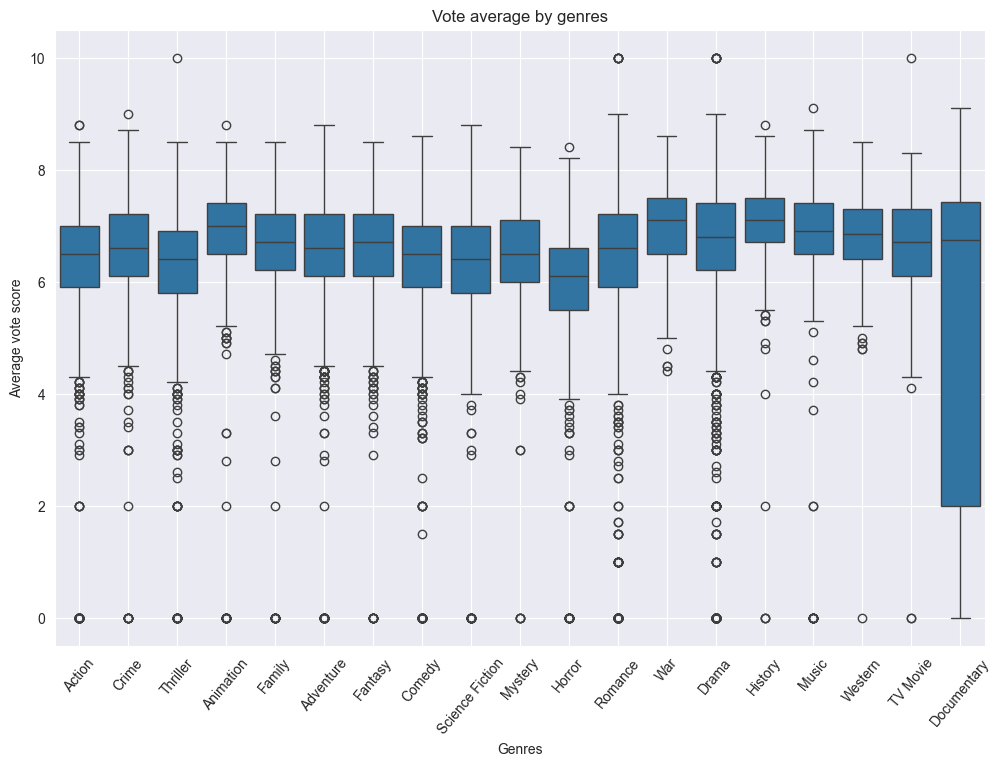

In [204]:
# Vote average by genres



plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='vote_average', data=df_separated_genres)

plt.title('Vote average by genres')
plt.xlabel('Genres')
plt.ylabel('Average vote score')
plt.grid('True')
plt.xticks(rotation=50)
plt.show()


In [205]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9970                                   [Romance, Drama]
9971                                  [Comedy, Mystery]
9972         [Drama, Horror, Science Fiction, Thriller]
9973                                   [Drama, Romance]
9974                                           [Horror]
Name: genres, Length: 9975, dtype: object

Adding profit column in DataFrame

In [206]:
df['profit'] = df['revenue'] - df['budget']
df_separated_genres['profit'] = df_separated_genres['revenue'] - df['budget']

In [207]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [217]:
df.to_csv('movies.csv', index=False)

In [209]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
# max_va

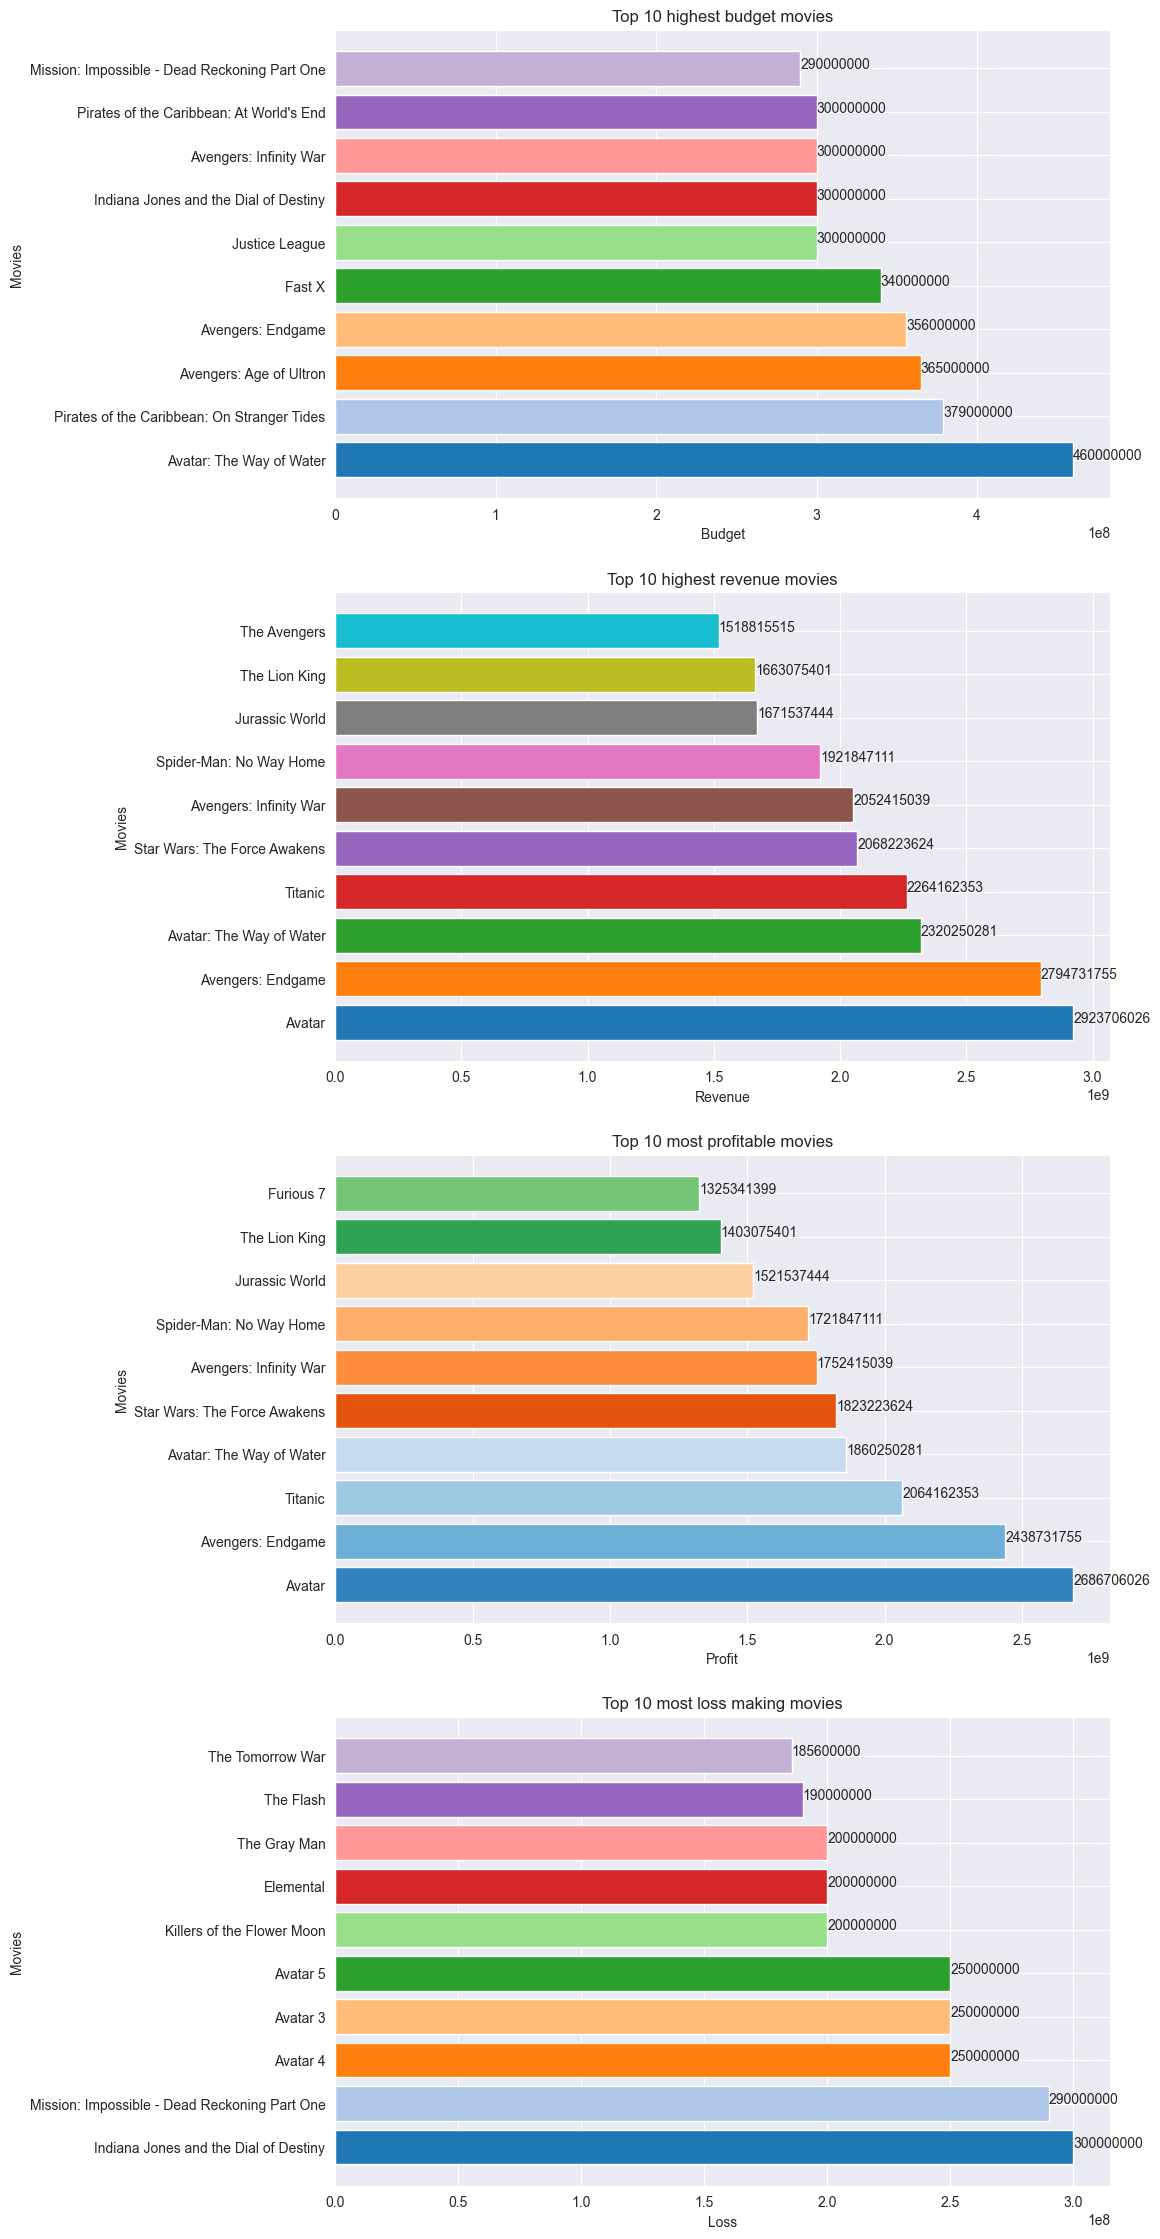

In [210]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

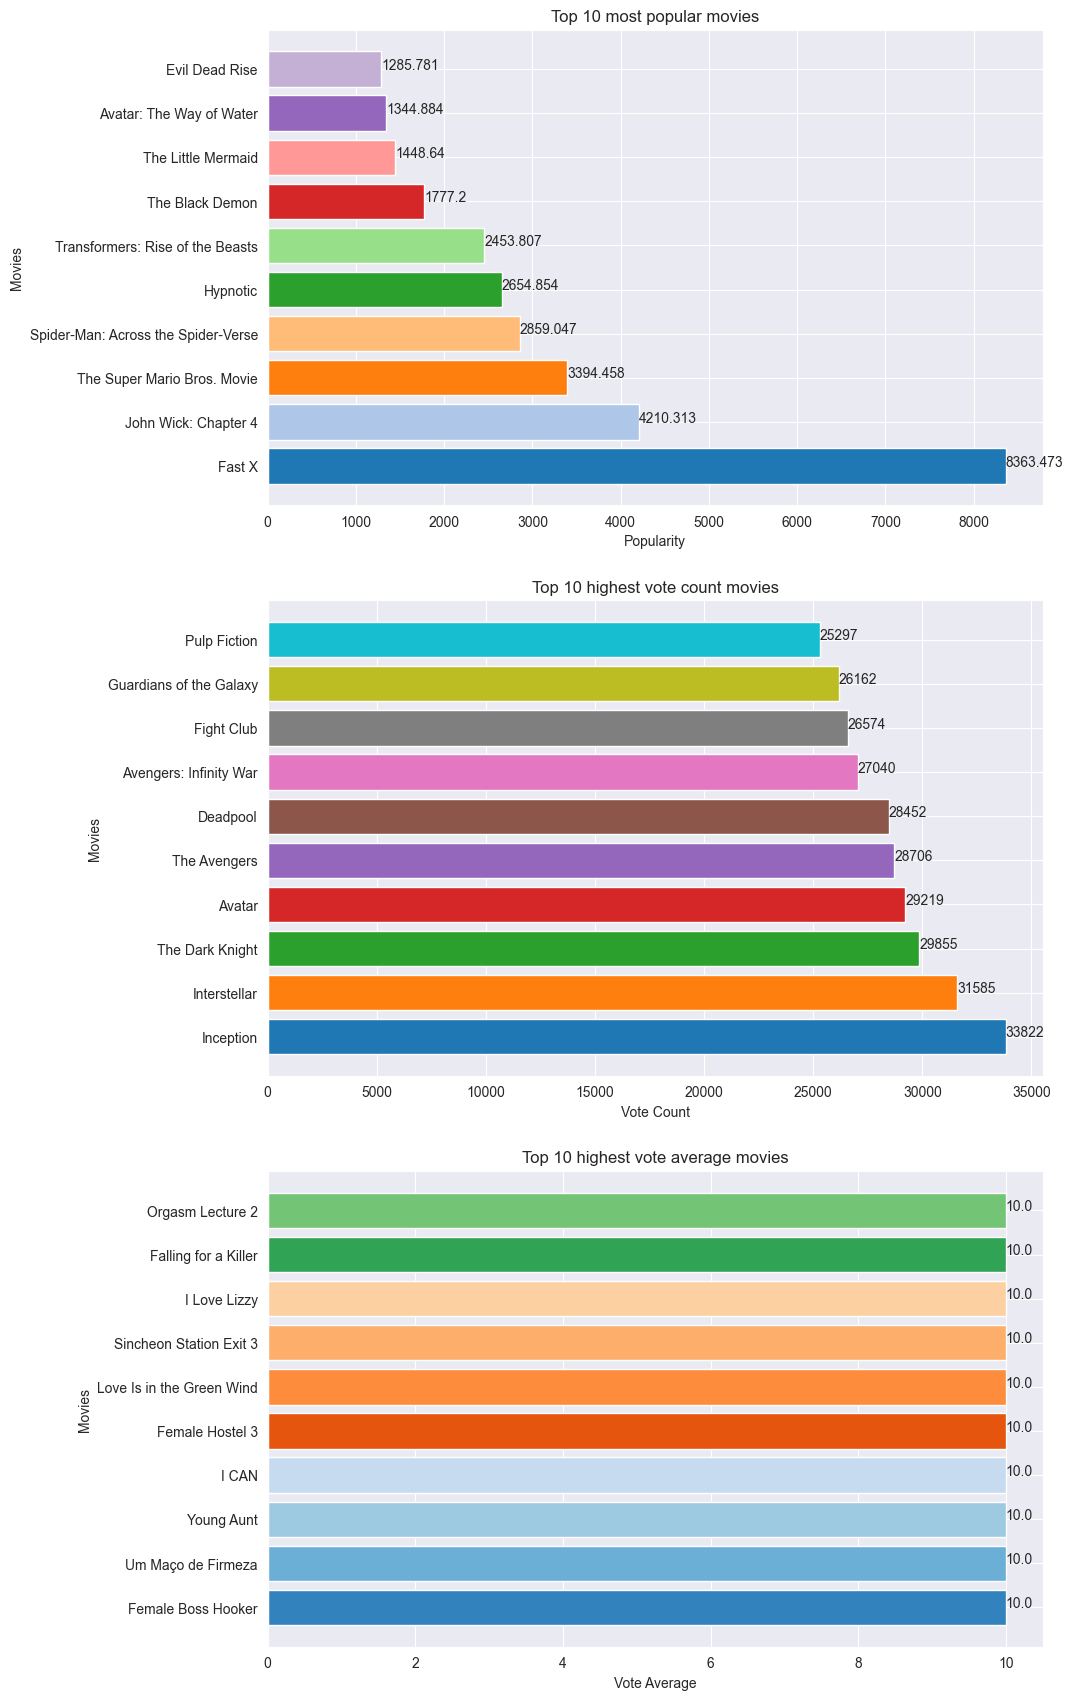

In [211]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()


Movies by their language

In [212]:
df_separated_genres['genres'].value_counts()

genres
Drama              3892
Comedy             2927
Action             2703
Thriller           2567
Adventure          1882
Romance            1650
Horror             1458
Animation          1344
Family             1329
Fantasy            1294
Crime              1251
Science Fiction    1223
Mystery             834
History             424
War                 301
Music               278
Documentary         172
TV Movie            171
Western             154
Name: count, dtype: int64

In [213]:
df['original_language'].value_counts()

original_language
English             7285
Japanese             663
Korean               396
French               334
Spanish              297
cn                   155
Chinese              153
Italian              151
German                88
Russian               71
Tagalog               48
Portuguese            48
Hindi                 33
Norwegian             29
Swedish               27
Danish                26
Dutch                 23
Thai                  22
Polish                21
Turkish               20
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Vietnamese             3
Basque                 3
Romanian               3
Czech                  3
Persian                3
Galician               2
Icelandic              2
Serbian                2
Khmer                  1
Oriya                  1
Haitian                1
Hungarian              1
Norwegi

In [214]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9970                                   [Romance, Drama]
9971                                  [Comedy, Mystery]
9972         [Drama, Horror, Science Fiction, Thriller]
9973                                   [Drama, Romance]
9974                                           [Horror]
Name: genres, Length: 9975, dtype: object

In [215]:
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

TypeError: eval() arg 1 must be a string, bytes or code object

In [ ]:
df_separated_genres

In [ ]:
df['genres'].isnull().sum()

In [ ]:

df_separated_genres.columns


In [ ]:
df_separated_genres['profit'] = df_separated_genres['revenue'] - df_separated_genres['budget']

# Group by genre
genre_groups = df_separated_genres.groupby('genres')

# Find the most profitable movie in each genre
most_profitable_movies = genre_groups.apply(lambda x: x.loc[x['profit'].idxmax()])

# Display the most profitable movies for each genre
print(most_profitable_movies[['genres', 'title', 'profit']])

5 Most profitable movies for every genres

In [ ]:

for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('profit', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Top 5 most popular movies.

In [ ]:
for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('popularity', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Story telling: Thai Movies

In [ ]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies

In [ ]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies[['title','release_date','budget','revenue']]

In [ ]:
no_zeros = df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]
japanese_movies = no_zeros[no_zeros['original_language'] == "Japanese"]
japanese_movies

In [ ]:
thai_movies.describe()

In [ ]:
# top 10 most popular thai movies

thai_movies_most_popular = thai_movies.sort_values('vote_count', ascending=False).sort_values('vote_count', ascending=False).sort_values('vote_average', ascending=False).head(10)
thai_movies_most_popular

In [ ]:
# top 5 most profitable thai movies

thai_movies_most_profitable = thai_movies.sort_values('profit', ascending=False)
thai_movies_most_profitable

In [ ]:
df['original_language'].value_counts()

In [ ]:
df_separated_genres

In [ ]:

# Calculate descriptive statistics
descriptive_stats = df[['revenue', 'budget', 'popularity', 'vote_average']].describe()
# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()
descriptive_stats, correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.title('Scatter Plot of Profit vs Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='profit', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()